<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,0.002586,207.742051,207.739359,0.002692
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,0.001760,184.571316,184.569624,0.001692
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,0.001750,330.736826,330.735123,0.001703
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.000011,182.427699,182.427883,-0.000184
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-0.000183,219.173321,219.173606,-0.000285
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,0.001460,198.720187,198.719159,0.001028
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,0.000138,287.737331,287.737077,0.000254
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-0.000254,249.052657,249.052363,0.000294
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,0.000282,214.859607,214.860043,-0.000436


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,0.002586,207.742051,207.739359,0.002692
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,0.001760,184.571316,184.569624,0.001692
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,0.001750,330.736826,330.735123,0.001703
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.000011,182.427699,182.427883,-0.000184
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-0.000183,219.173321,219.173606,-0.000285
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,0.001460,198.720187,198.719159,0.001028
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,0.000138,287.737331,287.737077,0.000254
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-0.000254,249.052657,249.052363,0.000294
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,0.000282,214.859607,214.860043,-0.000436


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.727660  42.192484  22.071342  48.747979  0.002586  207.742051   
      1.0    38.041465  40.789013  48.638133  47.100945  0.001760  184.571316   
      2.0    90.173179  48.085738  85.792530  96.683630  0.001750  330.736826   
      3.0    34.789349  63.769378  33.484614  40.384370 -0.000011  182.427699   
      4.0    22.980770  60.954319  75.432157  49.806257 -0.000183  219.173321   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548  0.001460  198.720187   
      16.0   69.973749  78.115903  84.913199  44.734342  0.000138  287.737331   
      17.0   89.476710  88.884093  29.373444  31.318665 -0.000254  249.052657   
      18.0   20.803996  62.420826  54.904837  66.729666  0.000282  214.859607   
      19.0   56.924452  39.999223  75.793435  48.807888  0.000622  231.525620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.739359  0.002692  
      1.0    184.569624  0.001692  
      2.0    330.735123  0.001703  
      3.0    182.427883 -0.000184  
      4.0    219.173606 -0.000285  
...                 ...       ...  
999.0 15.0   198.719159  0.001028  
      16.0   287.737077  0.000254  
      17.0   249.052363  0.000294  
      18.0   214.860043 -0.000436  
      19.0   231.524826  0.000795  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.727660  42.192484  22.071342  48.747979  0.002586  207.742051   
      1.0    38.041465  40.789013  48.638133  47.100945  0.001760  184.571316   
      2.0    90.173179  48.085738  85.792530  96.683630  0.001750  330.736826   
      3.0    34.789349  63.769378  33.484614  40.384370 -0.000011  182.427699   
      4.0    22.980770  60.954319  75.432157  49.806257 -0.000183  219.173321   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548  0.001460  198.720187   
      16.0   69.973749  78.115903  84.913199  44.734342  0.000138  287.737331   
      17.0   89.476710  88.884093  29.373444  31.318665 -0.000254  249.052657   
      18.0   20.803996  62.420826  54.904837  66.729666  0.000282  214.859607   
      19.0   56.924452  39.999223  75.793435  48.807888  0.000622  231.525620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.739359  0.002692  
      1.0    184.569624  0.001692  
      2.0    330.735123  0.001703  
      3.0    182.427883 -0.000184  
      4.0    219.173606 -0.000285  
...                 ...       ...  
999.0 15.0   198.719159  0.001028  
      16.0   287.737077  0.000254  
      17.0   249.052363  0.000294  
      18.0   214.860043 -0.000436  
      19.0   231.524826  0.000795  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,0.002586,207.742051,207.739359,0.002692
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,0.001760,184.571316,184.569624,0.001692
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,0.001750,330.736826,330.735123,0.001703
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.000011,182.427699,182.427883,-0.000184
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-0.000183,219.173321,219.173606,-0.000285
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,0.001460,198.720187,198.719159,0.001028
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,0.000138,287.737331,287.737077,0.000254
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-0.000254,249.052657,249.052363,0.000294
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,0.000282,214.859607,214.860043,-0.000436


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.727660  42.192484  22.071342  48.747979  0.002586  207.742051   
      1.0    38.041465  40.789013  48.638133  47.100945  0.001760  184.571316   
      2.0    90.173179  48.085738  85.792530  96.683630  0.001750  330.736826   
      3.0    34.789349  63.769378  33.484614  40.384370 -0.000011  182.427699   
      4.0    22.980770  60.954319  75.432157  49.806257 -0.000183  219.173321   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548  0.001460  198.720187   
      16.0   69.973749  78.115903  84.913199  44.734342  0.000138  287.737331   
      17.0   89.476710  88.884093  29.373444  31.318665 -0.000254  249.052657   
      18.0   20.803996  62.420826  54.904837  66.729666  0.000282  214.859607   
      19.0   56.924452  39.999223  75.793435  48.807888  0.000622  231.525620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.739359  0.002692  
      1.0    184.569624  0.001692  
      2.0    330.735123  0.001703  
      3.0    182.427883 -0.000184  
      4.0    219.173606 -0.000285  
...                 ...       ...  
999.0 15.0   198.719159  0.001028  
      16.0   287.737077  0.000254  
      17.0   249.052363  0.000294  
      18.0   214.860043 -0.000436  
      19.0   231.524826  0.000795  

[20000 rows x 8 columns]

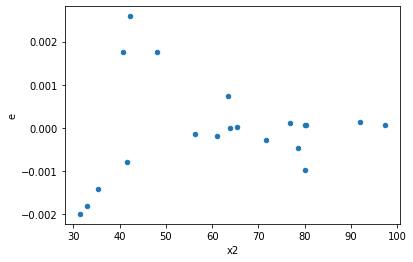

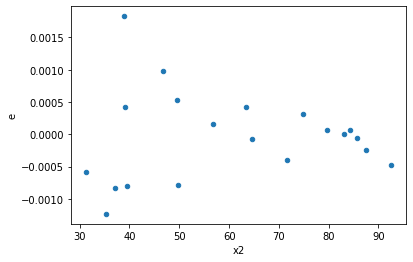

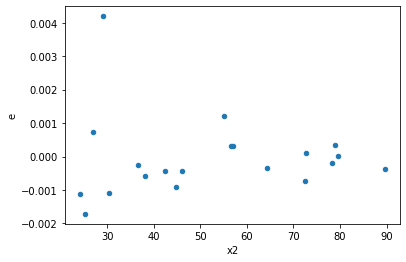

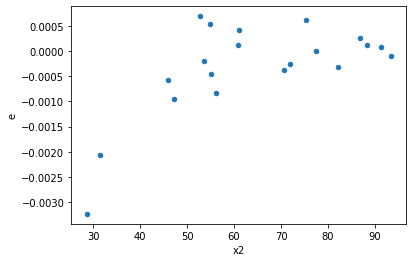

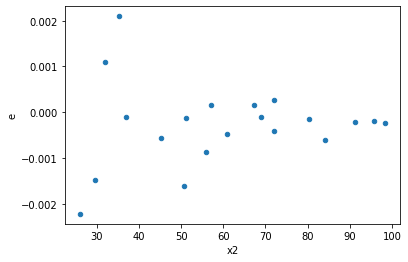

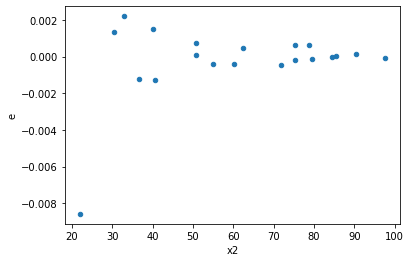

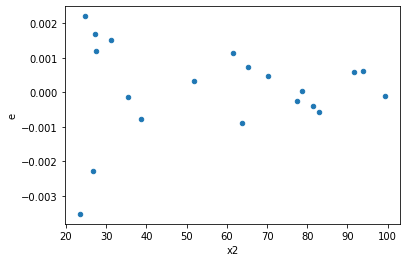

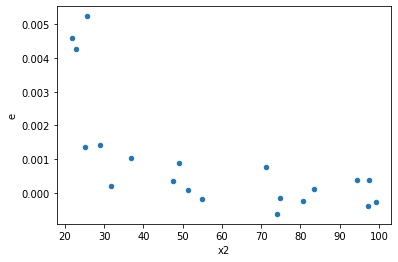

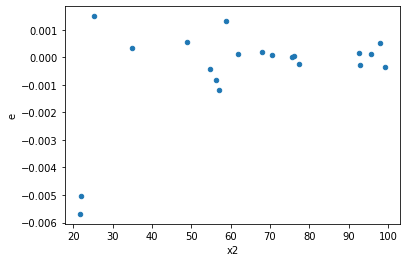

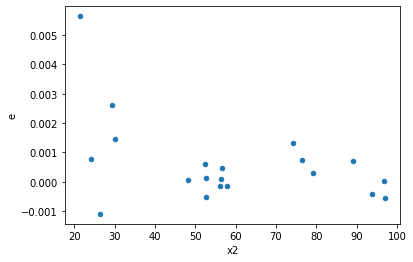

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
121.0,4.0,4.0,6.608145094015428e-07,1.2652809783636863e-06,1.652036273503857e-07,3.163202445909216e-07,1.9147294140220525,0.5447094983655763,0.7276452508172119,0.2723547491827881,Reject005=1 : Homoscedasticity
261.0,4.0,4.0,2.1236138531350677e-07,1.2789681577792078e-06,5.309034632837669e-08,3.1974203944480195e-07,6.022602253658692,0.1101124746667741,0.944943762666613,0.05505623733338705,Reject005=1 : Homoscedasticity
270.0,4.0,4.0,2.6925016718329923e-07,1.0366778382792761e-06,6.731254179582481e-08,2.5916945956981903e-07,3.850240277004285,0.21999302121224718,0.8900034893938764,0.10999651060612359,Reject005=1 : Homoscedasticity
386.0,4.0,4.0,5.660910194449988e-07,6.647971894015469e-07,1.415227548612497e-07,1.6619929735038673e-07,1.1743644865684684,0.879971321513251,0.5600143392433745,0.4399856607566255,Reject005=1 : Homoscedasticity
541.0,4.0,4.0,5.013019453605225e-07,1.0585890375641333e-06,1.2532548634013061e-07,2.6464725939103333e-07,2.111679492491946,0.4869090190138945,0.7565454904930528,0.24345450950694725,Reject005=1 : Homoscedasticity
649.0,4.0,4.0,2.641069103038137e-07,3.1204848340734566e-07,6.602672757595342e-08,7.801212085183641e-08,1.181523357523598,0.875473889149651,0.5622630554251745,0.4377369445748255,Reject005=1 : Homoscedasticity
701.0,4.0,4.0,4.291846929047289e-07,6.506927888843071e-07,1.0729617322618223e-07,1.6267319722107678e-07,1.5161136910088937,0.6966303054467899,0.651684847276605,0.34831515272339497,Reject005=1 : Homoscedasticity
739.0,4.0,4.0,1.887001779158069e-07,1.308738537890754e-06,4.717504447895173e-08,3.271846344726885e-07,6.935544800994724,0.08727470603066578,0.9563626469846671,0.04363735301533289,Reject005=1 : Homoscedasticity
747.0,4.0,4.0,2.414553899902193e-07,5.900887770093273e-07,6.036384749755483e-08,1.4752219425233183e-07,2.443883224281016,0.40795827381312,0.79602086309344,0.20397913690656,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,1.021283944586061e-05,2.9163965303009915e-07,2.5532098614651524e-06,7.290991325752479e-08,0.028556177209689153,0.00453922505862635,Reject005=0 : Heteroscedasticity
1.0,4.0,4.0,4.655611842496576e-06,1.6132123443316505e-07,1.163902960624144e-06,4.033030860829126e-08,0.034650920199278554,0.00657940675177222,Reject005=0 : Heteroscedasticity
2.0,4.0,4.0,6.695053342970351e-06,4.876961833361328e-07,1.6737633357425877e-06,1.219240458340332e-07,0.07284425655072671,0.02640894995544328,Reject005=0 : Heteroscedasticity
3.0,4.0,4.0,5.527178383266739e-07,1.362162010889244e-07,1.3817945958166846e-07,3.40540502722311e-08,0.24644799144046492,0.20364161150857307,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,7.585837365411349e-06,1.478947144002439e-07,1.8964593413528373e-06,3.697367860006098e-08,0.01949616202880777,0.002166236868599968,Reject005=0 : Heteroscedasticity
5.0,4.0,4.0,5.7930397952661556e-05,3.035401942687516e-07,1.4482599488165389e-05,7.58850485671879e-08,0.0052397394976777594,0.00016244994310908687,Reject005=0 : Heteroscedasticity
6.0,4.0,4.0,1.7758089241071403e-05,1.3502979355652622e-06,4.439522310267851e-06,3.3757448389131555e-07,0.07603846997470064,0.02854993359653879,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,2.479240601925243e-06,3.0392747471067556e-07,6.198101504813108e-07,7.598186867766889e-08,0.12258893891728866,0.06634147275220366,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,2.326292900759663e-05,3.3896643023748124e-07,5.815732251899157e-06,8.474160755937031e-08,0.01457109851157565,0.0012257239032990822,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    739
Reject005=1 : Homoscedasticity      261
Name: Result_test, dtype: int64